In [2]:
source("lda.R")
dfs <- read_wlws(800, "dna", 3)

[1] "unzips/n800/dna.scale-3"


In [3]:
pr <- lda_binary(dfs)

[1] 387 170
[1] 613 176
[1] 600 175


In [4]:
names(pr)

[1] "r"          "truth"      "summary"    "subclasses"

In [5]:
class(pr$r)
dim(pr$r)

[1] "array"

[1]    3    3 1000

In [6]:
pr$summary

n,dataset,run,i,j,bacc,ece,col_used
<dbl>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
800,dna,3,1,2,0.8957055,0.07746475,169
800,dna,3,1,3,0.8901809,0.06682538,175
800,dna,3,2,3,0.8602442,0.08310661,174


In [8]:
df <- data.frame(pred = plogis(pr$r[1,2,ix]), true = dfs$test$class_id[ix] == 1)

[1] 387 170
[1] 613 176
[1] 600 175


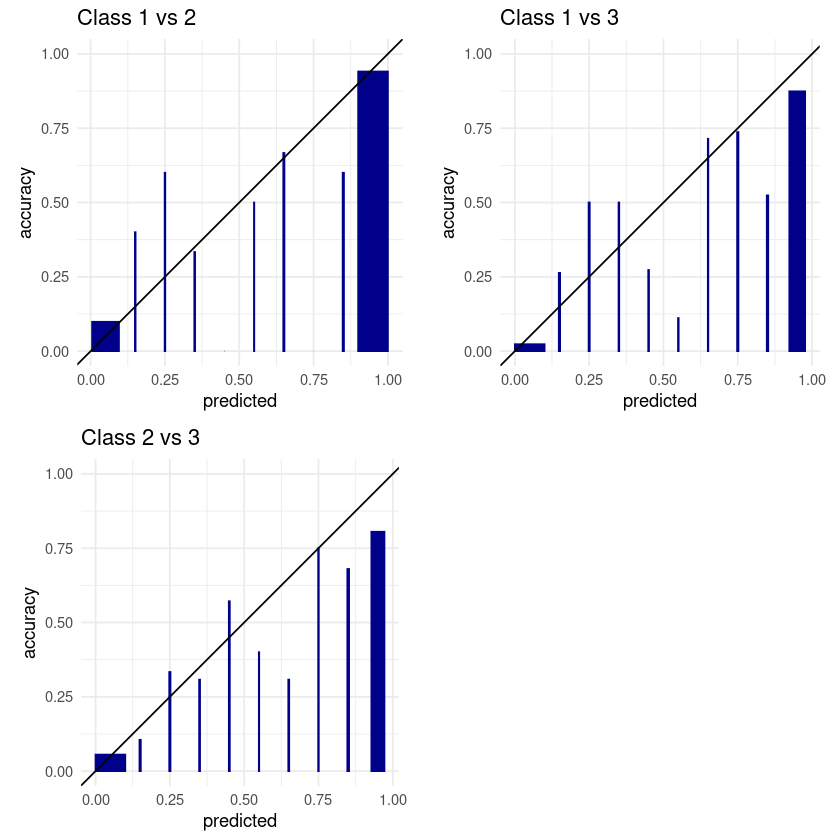

In [12]:
library(ggplot2)
library(ggpubr)

col <- "darkblue"

plot_calib <- function(dfs, i = 1 , j = 2, k = 3) {
    triple = c(i,j,k)
    pr <- lda_binary(dfs, subclasses = triple)
    pairs <- combn(3, 2)
    map (1:ncol(pairs), function(i) {
            ix <- dfs$test$class_id %in% triple[pairs[,i]]
            df <- data.frame(pred = plogis(pr$r[pairs[1,i], pairs[2,i],ix]), true = pr$truth[ix] == pairs[1,i])
            binned <- df %>% group_by(predicted = floor(pred * 10)/10 + 0.05) |>
             summarize(accuracy= mean(true == 1), tot = n())
            max_bin = max(binned$tot)
            #print(max_bin)
            ggplot(binned, aes(x = predicted, y = accuracy)) + 
            geom_col(width = binned$tot / (10*max_bin), col = col, fill =  col) +
             geom_abline(slope = 1, intercept = 0) + coord_fixed() +  theme_minimal() + 
             ylim(0,1) + 
            ggtitle(sprintf("Class %d vs %s", triple[pairs[1,i]], triple[pairs[2,i]]))
        }
    )
}
p <- plot_calib(dfs)
ggarrange(p[[1]], p[[2]], p[[3]], nrow = 2, ncol = 2)
#print(p[[3]])
#+
 #theme_xy("predicted probability", "actual accuracy")